## Importing requirements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

## Data loading

We execute a bash file to load the data from kaggle, organize our images in different folders (test, train, validation) and give the necessary rights to read files. It might take some time.

In [3]:
#To execute only once.
!./downloader.sh

    100% |████████████████████████████████| 61kB 77kB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 106kB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 52kB/s ta 0:00:011
    100% |████████████████████████████████| 235kB 74kB/s ta 0:00:011
  Running setup.py bdist_wheel for kaggle ... done
  Stored in directory: /home/Cissou/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... done
  Stored in directory: /home/Cissou/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
  Found existing installation: urllib3 1.23
    Uninstalling urllib3-1.23:
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python3.5/dist-packages/urllib3-1.23.dist-info/DESCRIPTION.rst'
Consider using the `--user` option or check the permissions.

./downloader.sh: 6: ./downloader.sh: kaggle: 

## Data overview

In [4]:
df = pd.read_csv('data/HAM10000_metadata.csv', sep = ',')
df.head()

FileNotFoundError: File b'data/HAM10000_metadata.csv' does not exist

#### CATEGORY DISTRIBUTION
*dx* corresponds to the type of skin cancer. We can see the the *nv* cancer is much more represented than other types of skin cancers.

In [130]:
sns.set(style="whitegrid", font_scale=1.5)

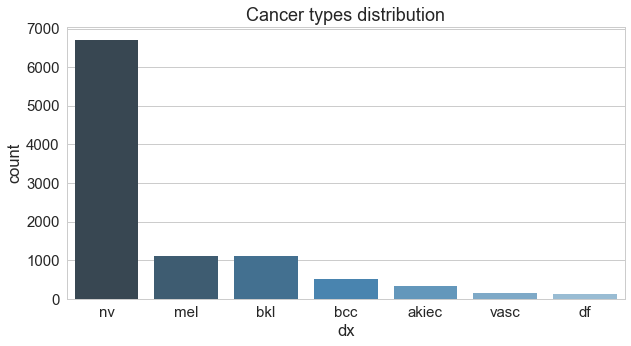

In [131]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='dx', data = df, palette = 'Blues_d', order = df['dx'].value_counts().index).set_title("Cancer types distribution")
plt.show()

#### DISTRIBUTION OF OTHER FEATURES

##### AGE

/Users/robinali/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/robinali/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


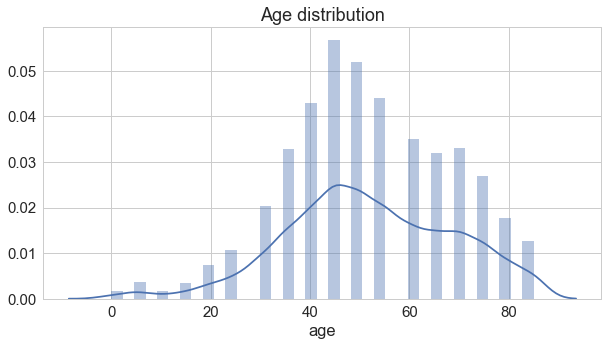

In [132]:
pyplot.subplots(figsize=(10, 5))
sns.distplot(df['age'].dropna()).set_title("Age distribution")
plt.show()

##### GENDER

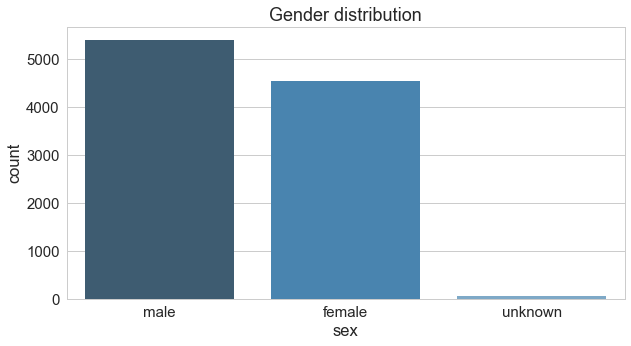

In [133]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='sex', data = df, palette = 'Blues_d').set_title("Gender distribution")
plt.show()

##### LOCALIZATION

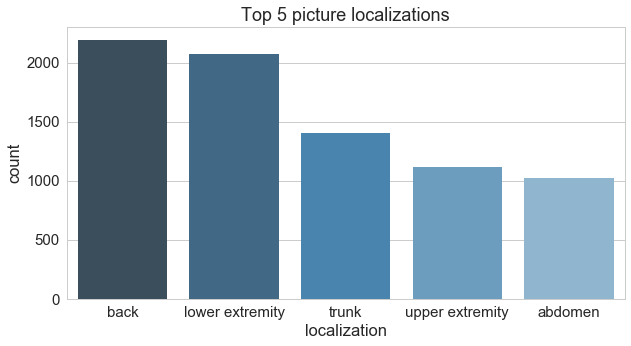

In [134]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='localization', data = df, palette = 'Blues_d', order = df['localization'].value_counts().iloc[:5].index).set_title("Top 5 picture localizations")
plt.show()

## Pre-processing

We use a pytorch transformer for data cleaning and data augmentation purposes:

* Our neural network has been pre-trained on 224 x 224 px images whereas input images are 600 x 450 px. Resizing and croping are necessary to adapt our image format. 

* The transformer will be applied at each epoch. Color jitter, random rotations and flips enable us to train the neural network with different inputs at each epoch (data augmentation).

In [ ]:
transform = transforms.Compose([
                transforms.Resize(224),
                transforms.CenterCrop(224),
                transforms.ColorJitter(hue=.05, saturation=.05),
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(360, resample=Image.BILINEAR),
                transforms.ToTensor(),
                normalize,
                ])

In [1]:
df.head()

NameError: name 'df' is not defined